In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#잘 되었음을 확인 할 수 있다. -> 좀 더 많은 데이터로 해보기

path = "/content/drive/MyDrive/데이터분석기초/과제/데이터/"
temp = pd.read_csv(path + "기온92_21.csv", header=0)
prec = pd.read_csv(path + "강수량92_21.csv", header=0)
hum = pd.read_csv(path + "습도92_21.csv", header=0)

In [ ]:
temp = temp[["일시", "평균기온(℃)"]]
prec = prec[["일시", "강수량(mm)"]]
hum = hum[["일시", "평균습도(%rh)"]]

In [ ]:
temp_prec = pd.merge(temp, prec, on="일시")
wheather = pd.merge(temp_prec, hum, on="일시")

In [ ]:
wheather["month"] = [a.split(".")[0] for a in wheather["일시"]]
wheather["year"] = [a.split(".")[1] for a in wheather["일시"]]

In [ ]:
def season(x):
    if x in ["Mar","Apr","May"]:
        return 0
    elif x in ["Jun","Jul","Aug"]:
        return 1
    elif x in ["Sep","Oct","Nov"]:
        return 2
    elif x in ["Dec","Jan","Feb"]:
        return 3

In [ ]:
wheather.head()

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,year
0,Jan.92,-0.2,13.6,68,Jan,92
1,Feb.92,0.7,46.6,62,Feb,92
2,Mar.92,7.6,11.2,58,Mar,92
3,Apr.92,12.0,76.5,59,Apr,92
4,May.92,16.4,155.5,65,May,92


In [ ]:
wheather.shape

(360, 6)

In [ ]:
#target 생성 (0: 봄, 1: 여름, 2: 가을, 3: 겨울)

wheather["target"] = wheather.apply(lambda x: season(x["month"]), axis=1)
wheather.head()

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,year,target
0,Jan.92,-0.2,13.6,68,Jan,92,3
1,Feb.92,0.7,46.6,62,Feb,92,3
2,Mar.92,7.6,11.2,58,Mar,92,0
3,Apr.92,12.0,76.5,59,Apr,92,0
4,May.92,16.4,155.5,65,May,92,0


In [ ]:
grouped_w = wheather.groupby(by=["year", "target"]).mean()
grouped_w = grouped_w.reset_index(level="target")
grouped_w

,target,평균기온(℃),강수량(mm),평균습도(%rh)
year,,,,
00,0,11.900000,36.333333,59.000000
00,1,25.566667,260.733333,72.666667
00,2,14.200000,74.566667,64.000000
00,3,-0.966667,23.966667,59.333333
01,0,12.566667,15.633333,54.000000
...,...,...,...,...
98,3,1.466667,15.466667,59.333333
99,0,12.700000,87.300000,58.333333
99,1,25.000000,320.900000,71.666667


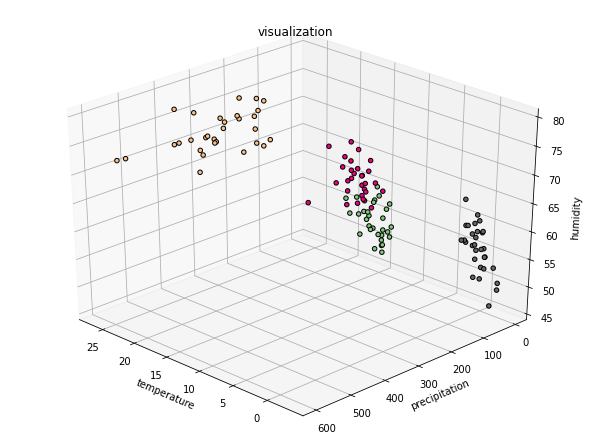

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(grouped_w.iloc[:,1],
           grouped_w.iloc[:,2],
           grouped_w.iloc[:,3],
           c = grouped_w["target"],
           edgecolor="k",
           alpha=1,
           cmap="Accent")

ax.set_title("visualization")
ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()

In [ ]:
grouped_X = grouped_w.iloc[:,1:4]
grouped_y = grouped_w["target"]

In [ ]:
#scale이 제각각 -> 표준화 필요
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()   
grouped_X = scaler.fit_transform(grouped_X)

In [ ]:
#n_cluster=3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300)
kmeans.fit(grouped_X)

KMeans(n_clusters=3)

In [ ]:
labels = kmeans.labels_

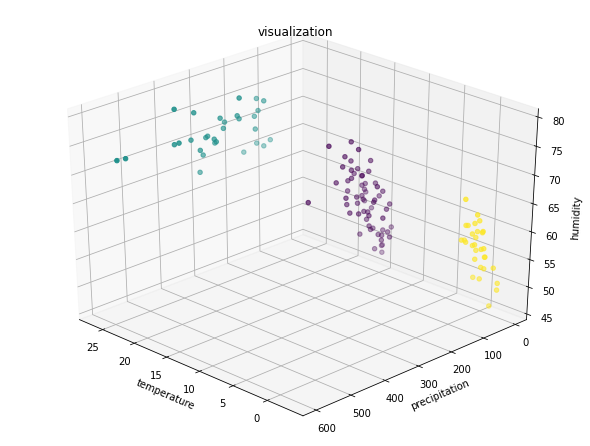

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(grouped_w.iloc[:,1],
           grouped_w.iloc[:,2],
           grouped_w.iloc[:,3],
           c = labels)

ax.set_title("visualization")
ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()

In [ ]:
labels

array([0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1,
       0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1,
       0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1,
       0, 2, 0, 1, 0, 2, 0, 1, 0, 2], dtype=int32)

In [ ]:
#n_cluster=4
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300)
kmeans.fit(grouped_X)

KMeans(n_clusters=4)

In [ ]:
labels = kmeans.labels_

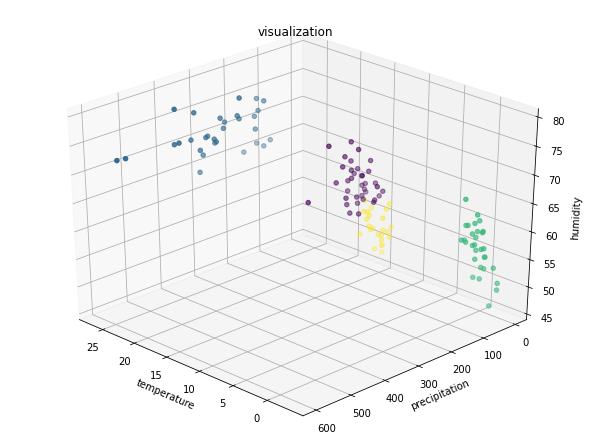

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(grouped_w.iloc[:,1],
           grouped_w.iloc[:,2],
           grouped_w.iloc[:,3],
           c = labels)

ax.set_title("visualization")
ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()

In [ ]:
labels

array([3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1,
       0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2,
       3, 1, 3, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 1, 0, 2, 3, 1, 0, 2, 3, 1,
       0, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 1,
       0, 2, 0, 1, 0, 2, 3, 1, 0, 2], dtype=int32)

In [ ]:
grouped_w["cluster"] = labels
grouped_w

,target,평균기온(℃),강수량(mm),평균습도(%rh),cluster
year,,,,,
00,0,11.900000,36.333333,59.000000,3
00,1,25.566667,260.733333,72.666667,1
00,2,14.200000,74.566667,64.000000,0
00,3,-0.966667,23.966667,59.333333,2
01,0,12.566667,15.633333,54.000000,3
...,...,...,...,...,...
98,3,1.466667,15.466667,59.333333,2
99,0,12.700000,87.300000,58.333333,3
99,1,25.000000,320.900000,71.666667,1


In [ ]:
pd.crosstab(grouped_w["target"], grouped_w["cluster"])

cluster,0,1,2,3
target,,,,
0,8,0,0,22
1,0,30,0,0
2,28,0,0,2
3,0,0,30,0


In [ ]:
#target 1과 3 30개로 잘 clustering / target 0과 2 (봄, 가을) 봄 중 22개는 봄으로 8개는 가을로 구분, 가을 중 28개는 가을 2개는 봄으로 구분
#약간의 차이를 보이지만 잘 클러스터링 되었다고 볼 수 있다. 